In [1]:
import siniflar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

In [2]:
data=pd.read_csv("hmelq.csv")

In [3]:
siniflar.DataInformation(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 335.3+ KB
None
*******************************
          count           mean           std      min       25%        50%  \
bad      3576.0       0.199385      0.399594     0.00      0.00      0.000   
loan     3576.0   18529.697987  11262.834060  1100.00  11000.00  1

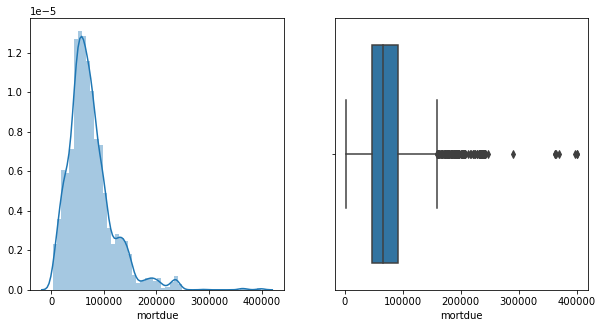

In [4]:
var="mortdue"
gorsel=siniflar.Visualation.HistogramveKutu(var,data)

In [5]:
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [200]:
newData=siniflar.Manipulation.Manipulate(data)

In [84]:
bad_reason=pd.crosstab(index=newData["bad"],columns=newData["reason"])
bad_reason

reason,DebtCon,HomeImp
bad,,
0,1304,536
1,124,54


In [95]:
bad_job=pd.crosstab(index=newData["bad"],columns=newData["job"])
bad_job

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,242,326,694,504,23,51
1,27,22,80,35,7,7


In [94]:
from scipy import stats
chi2,p ,dof,expected=stats.chi2_contingency(bad_reason)
p


0.0034140218372415696

In [97]:
chi21,p1 ,dof1,expected1=stats.chi2_contingency(bad_job)
p1

0.0034140218372415696

In [98]:
newData.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [201]:
reason=pd.get_dummies(newData[["reason"]]).astype('float64')
job=pd.get_dummies(newData[["job"]]).astype('float64')

In [202]:
newData=newData.drop(["job"],axis=1)
newData=newData.drop(["reason"],axis=1)

In [206]:
lojData=pd.concat([newData,reason],axis=1)


lojData

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1.0,0.0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1.0,0.0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1.0,0.0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0.0,1.0
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,15637.0,39660.0,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0.0,1.0
3546,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0.0,1.0
3547,1,27300,106221.0,137727.0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,1.0,0.0
3548,1,37300,68789.0,86172.0,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0.0,1.0


In [207]:
siniflar.DataInformation(lojData)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bad             2018 non-null   int64  
 1   loan            2018 non-null   int64  
 2   mortdue         2018 non-null   float64
 3   value           2018 non-null   float64
 4   yoj             2018 non-null   float64
 5   derog           2018 non-null   float64
 6   delinq          2018 non-null   float64
 7   clage           2018 non-null   float64
 8   ninq            2018 non-null   float64
 9   clno            2018 non-null   float64
 10  debtinc         2018 non-null   float64
 11  reason_DebtCon  2018 non-null   float64
 12  reason_HomeImp  2018 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 220.7 KB
None
*******************************
                 count           mean           std       min         25%  \
bad             2018.0       0.088206      0.2836

In [208]:
y=lojData["bad"]
x=lojData.drop(["bad"],axis=1)

In [209]:
model=siniflar.modelOfStats.lojistic(x,y)

Optimization terminated successfully.
         Current function value: 0.231216
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2006
Method:                           MLE   Df Model:                           11
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.2251
Time:                        17:46:33   Log-Likelihood:                -466.59
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 1.089e-51
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -1.676e-05   1.02e-05     -1.651      0.099   -3.67e-05    3.14e-06
mortdue         -

In [210]:
x=x.drop(["mortdue","value","yoj","loan","ninq"],axis=1)

In [236]:
model_loj=siniflar.modelOfReg.reg(x,y)

In [212]:
model_loj

LogisticRegression(solver='liblinear')

In [244]:
y_pred=model_loj.predict(x)

In [245]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y,y_pred)

array([[1833,    7],
       [ 142,   36]], dtype=int64)

In [246]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1840
           1       0.84      0.20      0.33       178

    accuracy                           0.93      2018
   macro avg       0.88      0.60      0.64      2018
weighted avg       0.92      0.93      0.90      2018



In [247]:
print(accuracy_score(y,y_pred))

0.9261645193260654


In [248]:
y_probs=model_loj.predict_proba(x) 

In [256]:
y_probs = y_probs[:,1]

In [262]:
y_pred = [1 if i > 0.35 else 0 for i in y_probs]

In [263]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1840
           1       0.74      0.30      0.42       178

    accuracy                           0.93      2018
   macro avg       0.84      0.64      0.69      2018
weighted avg       0.92      0.93      0.91      2018



In [264]:
confusion_matrix(y,y_pred)

array([[1821,   19],
       [ 125,   53]], dtype=int64)

In [266]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

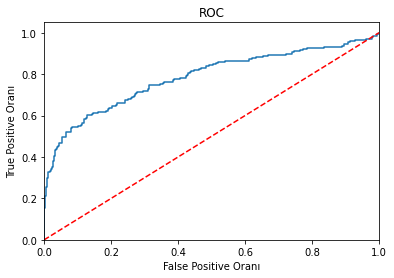

In [268]:
logit_roc_auc = roc_auc_score(y,model_loj.predict(x))

fpr, tpr, thresholds = roc_curve(y,model_loj.predict_proba(x)[:,1] )
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [269]:
logit_roc_auc 

0.5992214215925745

In [271]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [272]:
X_train ,X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20 , random_state = 42)

In [274]:
model_loj2=siniflar.modelOfReg.reg(X_train,y_train)


In [275]:
accuracy_score(y_test ,model_loj2.predict(X_test))

0.9257425742574258

In [276]:
y_pred2 = model_loj2.predict(X_test)

In [278]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       369
           1       0.86      0.17      0.29        35

    accuracy                           0.93       404
   macro avg       0.89      0.58      0.62       404
weighted avg       0.92      0.93      0.90       404



In [279]:
cross_val_score(model_loj2, X_test, y_test, cv = 10).mean()

0.9234146341463415